# 2348045

# CAT1

# Neural Network and Deep learning

### 2
# Face Recognition using CNN

# Introduction

Convolutional Neural Networks (CNNs) are highly effective for facial recognition because they automatically learn features from images, such as edges, textures, and complex patterns, without manual intervention. This capability makes CNNs ideal for distinguishing subtle facial details like expressions and lighting variations. As a result, CNNs provide high accuracy in identifying individuals, making them essential for applications in security, surveillance, and personalized user experiences.









# Dataset Description

### ORL Database of Faces (AT&T Database of Faces) - Summary

The ORL Database of Faces, also known as the AT&T Database of Faces, is a collection of facial images used in machine learning and computer vision for facial recognition and image classification.

**Key Features:**

- **Total Images**: 400 grayscale images.
- **Subjects**: 40 individuals, each with 10 images.
- **Variations**:
  - **Lighting**: Different lighting conditions.
  - **Facial Expressions**: Variations include open/closed eyes and smiling/not smiling.
  - **Facial Details**: Includes images with and without glasses.
  - **Head Position**: Upright, frontal positions with minor side movements.
- **Image Specs**:
  - **Size**: 92x112 pixels.
  - **Gray Levels**: 256 levels per pixel.
- **Background**: Dark, homogeneous background with subjects in an upright, frontal position.


**Download**: [ORL Database of Faces on Kaggle](https://www.kaggle.com/datasets/kasikrit/att-database-of-faces).

 # Step1:
 
Importing Packages

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
import itertools
from tensorflow.keras.metrics import Precision, Recall

# Step2:

Load Dataset :

After loading the Dataset we have to normalize every image.



In [4]:
#load dataset
data = np.load('ORL_faces.npz') 

# load the "Train Images"
x_train = data['trainX']
#normalize every image
x_train = np.array(x_train,dtype='float32')/255

x_test = data['testX']
x_test = np.array(x_test,dtype='float32')/255

# load the Label of Images
y_train= data['trainY']
y_test= data['testY']

# show the train and test Data format
print('x_train : {}'.format(x_train[:]))
print('Y-train shape: {}'.format(y_train))
print('x_test shape: {}'.format(x_test.shape))

x_train : [[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]
Y-train shape: [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 1

# Step 3

Split DataSet : Validation data and Train 

Validation DataSet: this data set is used to minimize overfitting.If the accuracy over the training data set increases, but the accuracy over then validation data set stays the same or decreases, then we have to stop overfitting our neural network and we  should stop training.

 * Note: we usually use 30 percent of every dataset as the validation data but Here we only used 5 percent because the number of images in this dataset is very low. 



In [5]:
x_train, x_valid, y_train, y_valid= train_test_split(
    x_train, y_train, test_size=.05, random_state=1234,)

# Step 4

for using the CNN, we need to change The size of images ( The size of images must be the same)

In [6]:
im_rows=112
im_cols=92
batch_size=512
im_shape=(im_rows, im_cols, 1)

#change the size of images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

print('x_train shape: {}'.format(y_train.shape[0]))
print('x_test shape: {}'.format(y_test.shape))

x_train shape: 228
x_test shape: (160,)


# Step 5


Build CNN model:
 CNN have 3 main layer: 
 * 1-Convolotional layer 
 * 2- pooling layer  
 * 3- fully connected layer
 

 

In [22]:

#filters= the depth of output image or kernels

cnn_model= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
     Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    #20 is the number of outputs
    Dense(20, activation='softmax')  
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)


Show the model's parameters.

In [23]:
cnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 106, 86, 36)         │           1,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 53, 43, 36)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 49, 39, 54)          │          48,654 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 24, 19, 54)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 24624)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 2024)                │      49,841,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 2024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1024)                │       2,073,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 20)                  │          10,260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,500,114 (200.27 MB)

 Trainable params: 52,500,114 (200.27 MB)

 Non-trainable params: 0 (0.00 B)


### Model Overview:
- **Total Parameters**: 52,500,114 (200.27 MB)
- **Trainable Parameters**: 52,500,114
- **Non-Trainable Parameters**: 0

### Layer-by-Layer Breakdown:

1. **conv2d_6 (Conv2D)**
   - **Output Shape**: (None, 106, 86, 36)
   - **Parameters**: 1,800
   - Convolutional layer with 36 filters, kernel size (3x3), resulting in an output shape of 106x86.

2. **max_pooling2d_6 (MaxPooling2D)**
   - **Output Shape**: (None, 53, 43, 36)
   - **Parameters**: 0
   - Max pooling layer (2x2), reducing dimensions by half.

3. **conv2d_7 (Conv2D)**
   - **Output Shape**: (None, 49, 39, 54)
   - **Parameters**: 48,654
   - Convolutional layer with 54 filters, kernel size (3x3).

4. **max_pooling2d_7 (MaxPooling2D)**
   - **Output Shape**: (None, 24, 19, 54)
   - **Parameters**: 0
   - Max pooling layer (2x2), reducing dimensions by half.

5. **flatten_3 (Flatten)**
   - **Output Shape**: (None, 24624)
   - **Parameters**: 0
   - Flattens the output to a 1D vector for the fully connected layers.

6. **dense_12 (Dense)**
   - **Output Shape**: (None, 2024)
   - **Parameters**: 49,841,000
   - Fully connected layer with 2024 neurons.

7. **dropout_9 (Dropout)**
   - **Output Shape**: (None, 2024)
   - **Parameters**: 0
   - Dropout layer to prevent overfitting.

8. **dense_13 (Dense)**
   - **Output Shape**: (None, 1024)
   - **Parameters**: 2,073,600
   - Fully connected layer with 1024 neurons.

9. **dropout_10 (Dropout)**
   - **Output Shape**: (None, 1024)
   - **Parameters**: 0
   - Dropout layer to prevent overfitting.

10. **dense_14 (Dense)**
    - **Output Shape**: (None, 512)
    - **Parameters**: 524,800
    - Fully connected layer with 512 neurons.

11. **dropout_11 (Dropout)**
    - **Output Shape**: (None, 512)
    - **Parameters**: 0
    - Dropout layer to prevent overfitting.

12. **dense_15 (Dense)**
    - **Output Shape**: (None, 20)
    - **Parameters**: 10,260
    - Fully connected output layer with 20 neurons, likely representing the number of output classes.

### Summary:
The model consists of two convolutional blocks with max pooling layers, followed by a series of dense layers with dropout to prevent overfitting. The large number of parameters in the dense layers, particularly `dense_12`, contributes significantly to the overall parameter count. The final layer is likely a softmax or sigmoid activation for classification purposes.



# Step 6

Training the Model



In [24]:
history=cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=512,
    epochs=250, verbose=2,
    validation_data=(np.array(x_valid),np.array(y_valid)),
)

Epoch 1/250
1/1 - 4s - 4s/step - accuracy: 0.0614 - loss: 3.0143 - val_accuracy: 0.0833 - val_loss: 3.0019
Epoch 2/250
1/1 - 1s - 1s/step - accuracy: 0.0702 - loss: 3.0250 - val_accuracy: 0.0833 - val_loss: 3.0142
Epoch 3/250
1/1 - 1s - 1s/step - accuracy: 0.0570 - loss: 3.0310 - val_accuracy: 0.0833 - val_loss: 3.0266
Epoch 4/250
1/1 - 1s - 1s/step - accuracy: 0.0921 - loss: 2.9860 - val_accuracy: 0.0833 - val_loss: 3.0366
Epoch 5/250
1/1 - 1s - 1s/step - accuracy: 0.0833 - loss: 3.0222 - val_accuracy: 0.0000e+00 - val_loss: 3.0452
Epoch 6/250
1/1 - 1s - 1s/step - accuracy: 0.0482 - loss: 3.0348 - val_accuracy: 0.0000e+00 - val_loss: 3.0409
Epoch 7/250
1/1 - 1s - 1s/step - accuracy: 0.0482 - loss: 3.0027 - val_accuracy: 0.0000e+00 - val_loss: 3.0353
Epoch 8/250
1/1 - 1s - 1s/step - accuracy: 0.0526 - loss: 3.0038 - val_accuracy: 0.0000e+00 - val_loss: 3.0303
Epoch 9/250
1/1 - 1s - 1s/step - accuracy: 0.0482 - loss: 2.9962 - val_accuracy: 0.0000e+00 - val_loss: 3.0213
Epoch 10/250
1/1 

Evaluate the test data


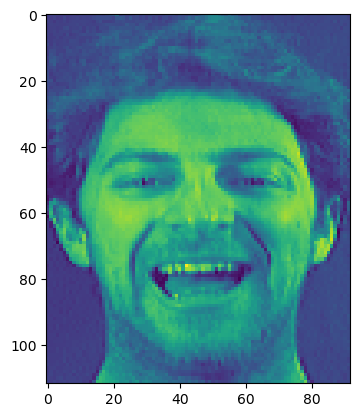

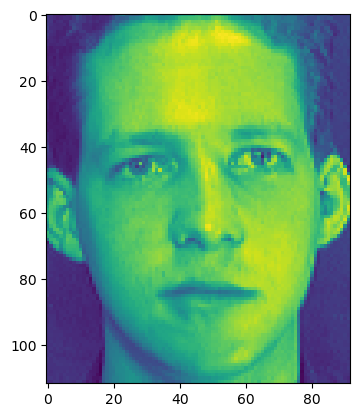

In [12]:
# To See the images in Train and Test data.

c=x_train[1].reshape(112,92)
plt.imshow(c)
plt.show()
d=x_test[1].reshape(112,92)
plt.imshow(d)

In [25]:
scor = cnn_model.evaluate( np.array(x_test),  np.array(y_test), verbose=0)

print('test los {:.4f}'.format(scor[0]))
print('test acc {:.4f}'.format(scor[1]))

test los 0.4115
test acc 0.9375


# Interpretation:
The model performs quite well with a high test accuracy of 93.75% and a moderate test loss of 0.4115.
The low loss and high accuracy suggest that the model has learned to generalize well on unseen data, though some improvements might still be possible, especially if the loss could be reduced further.

# Step 7 

plot the result

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


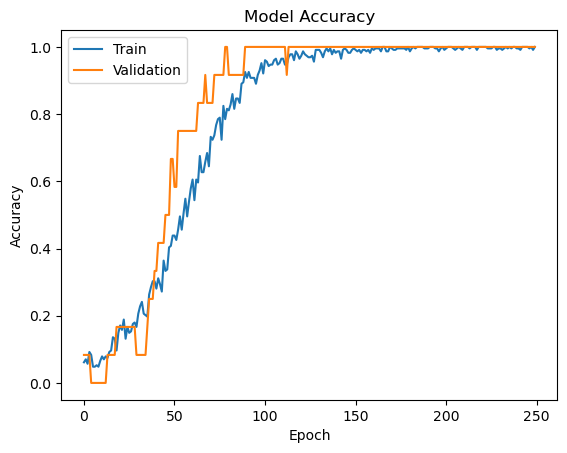

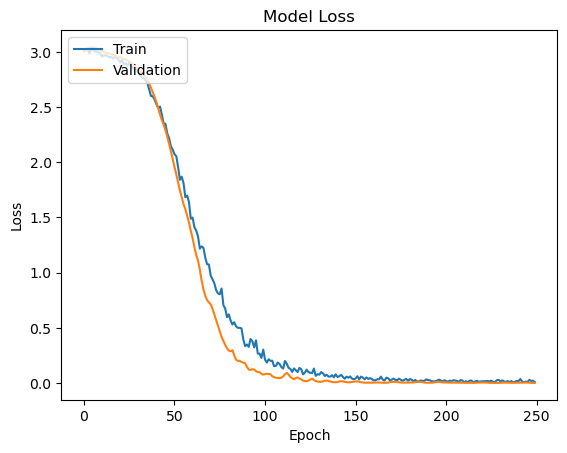

In [26]:
# List all data in history
print(history.history.keys())

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot1

Both training and validation accuracy increase rapidly during the initial epochs.
Around epoch 50, the validation accuracy reaches a plateau close to 1.0, indicating the model is performing very well on the validation set.
The training accuracy continues to rise and matches the validation accuracy closely after about epoch 50, suggesting that the model is fitting both the training and validation data well without overfitting.

# Plot2
Both training and validation loss decrease rapidly in the early epochs, indicating that the model is learning well.
After about epoch 50, both the training and validation loss converge to a low and stable value, suggesting the model has reached a good point of convergence.
There is no significant divergence between the training and validation loss, further confirming that the model is not overfitting.

# Summary 
The plots show that the model is performing well, with high accuracy and low loss for both training and validation data.
There is a good balance between training and validation performance, indicating that the model is generalizing well to unseen data.

# step 8

Plot Confusion Matrix

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Accuracy: 0.9375
Confusion matrix, without normalization
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]
Confusion matrix, without normalization


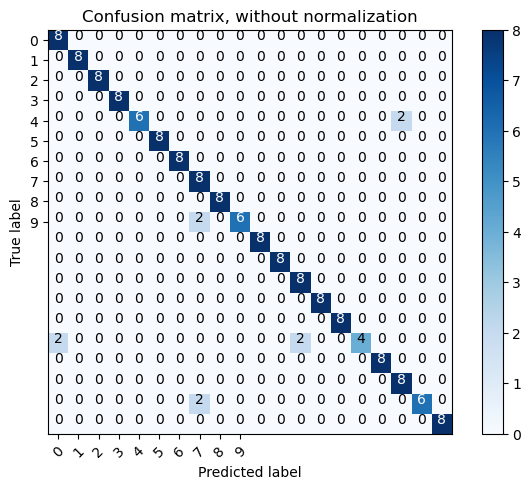

Confusion matrix:
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1

In [28]:

predicted = np.array(cnn_model.predict(x_test))

# Use np.argmax to get class predictions
ynew = np.argmax(predicted, axis=1)

# Compute accuracy
Acc = accuracy_score(y_test, ynew)
print("Accuracy:", Acc)

# Compute confusion matrix
cnf_matrix = confusion_matrix(np.array(y_test), ynew)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

print('Confusion matrix, without normalization')
print(cnf_matrix)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3,4,5,6,7,8,9],
                      title='Confusion matrix, without normalization')



print("Confusion matrix:\n%s" % confusion_matrix(np.array(y_test), ynew))
print(classification_report(np.array(y_test), ynew))


# Accuracy: 
The accuracy of the model is displayed as 0.9375 (93.75%). This means that the model correctly classified approximately 93.75% of the instances in the dataset.

# Confusion Matrix:
The rows represent the true labels, and the columns represent the predicted labels.
Each cell in the matrix shows the number of instances where the model predicted a specific label (column) for a true label (row).
Diagonal values indicate correct predictions (where true labels match predicted labels), and off-diagonal values represent misclassifications.
# Heatmap:
The darker the color, the higher the number of instances classified for that specific pair of true and predicted labels.
Most of the dark blue color is concentrated along the diagonal, which indicates that the model is performing well in correctly classifying the instances.

# Metrics
Precision: The ratio of correctly predicted positive observations to the total predicted positives. It indicates how many of the predicted positive instances were actually correct.

Recall: The ratio of correctly predicted positive observations to all observations in the actual class. It shows how well the model is capturing all the relevant instances of a class.

F1-Score: The weighted average of precision and recall. It provides a balance between precision and recall, especially when the class distribution is imbalanced.

Support: The number of actual occurrences of each class in the dataset.

# Macro Avg: 
The unweighted mean of precision, recall, and F1-score across all classes. This gives equal weight to each class, regardless of its support. The macro average precision, recall, and F1-score are all around 0.94-0.95, indicating strong performance across all classes.

# Weighted Avg: 
The weighted mean of precision, recall, and F1-score, where each class's contribution is weighted by its support. Like the macro average, the weighted average is also around 0.94, showing that the model performs well even when considering the support of each class.

# Conclusion
The combination of high accuracy, well-distributed precision, recall, and F1-scores across classes, along with a well-performing confusion matrix and heatmap, indicates that the model is not only accurate but also robust and well-balanced in handling various classes. This suggests it is ready for deployment in practical scenarios or can be further fine-tuned for even better performance.

# 1

# Single layer Multi Output layer Perceptron

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

# Dataset 

Description:
The E-commerce Sales Data dataset provides a comprehensive collection of information related to user profiles, product details, and user-product interactions. It is a valuable resource for understanding customer behavior, preferences, and purchasing trends on an e-commerce platform.

Dataset Structure:

User Sheet: This sheet contains user profiles, including details such as user ID, name, age, location, and other relevant information. It helps in understanding the demographics and characteristics of the platform's users.

Product Sheet: The product sheet offers insights into the various products available on the e-commerce platform. It includes product IDs, names, categories, prices, descriptions, and other product-specific attributes.

Interactions Sheet: The interactions sheet is a crucial component of the dataset, capturing the interactions between users and products. It records details of user actions, such as product views, purchases, reviews, and ratings. This data is essential for building recommendation systems and understanding user preferences.


In [32]:
Stock = pd.read_csv("C:\\Users\\User\\Downloads\\customer_details.csv",  index_col=0)

df_User = Stock

df_User

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4443 - val_loss: 0.1682
Epoch 2/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1667 - val_loss: 0.1616
Epoch 3/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1546 - val_loss: 0.1432
Epoch 4/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1377 - val_loss: 0.1349
Epoch 5/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1293 - val_loss: 0.1265
Epoch 6/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1215 - val_loss: 0.1222
Epoch 7/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1180 - val_loss: 0.1211
Epoch 8/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1172 - val_loss: 0.1219
Epoch 9/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1153 - val_loss: 0.1224
Epoch 10/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1149 - val_loss: 0.1234
Epoch 11/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1145 - val_loss: 0.1218
Epoch 12/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

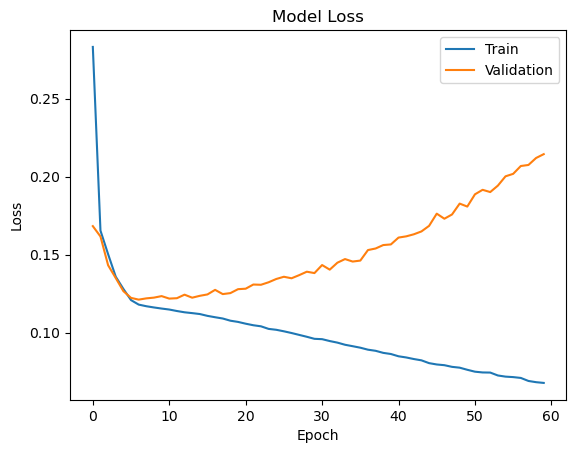

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

# Load customer details data
df_Customer = pd.read_csv('C:/Users/User/Downloads/customer_details.csv')

# Drop the 'Item Purchased' target column and select the rest as features
X = df_Customer.drop(columns=['Item Purchased'], axis=1)
Y = pd.get_dummies(df_Customer['Item Purchased'])  # One-hot encoding the target variable

# Preprocessing pipeline for numerical and categorical data
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Apply preprocessing to the features
X_preprocessed = preprocessor.fit_transform(X)

# Function to create train, validation, and test sets
def create_train_test_set(X, Y):
    # Splitting the dataset
    X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.12, random_state=42)
    X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

    return X_train, X_val, X_test, Y_train, Y_val, Y_test

X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(X_preprocessed, Y)

# Define MLP model architecture for multi-output
def create_mlp_model(input_dim, output_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(output_dim, activation='sigmoid'))  # Sigmoid for multi-output
    model.compile(optimizer='adam', loss='binary_crossentropy')
    return model

output_dim = Y_train.shape[1]  # Number of different product types

# Create and train the MLP model
model = create_mlp_model(X_train.shape[1], output_dim)
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=60, batch_size=16, verbose=1)

# Evaluate the model
def evaluate_model(model, X_train, Y_train, X_val, Y_val, X_test, Y_test):
    Y_train_pred = model.predict(X_train)
    Y_val_pred = model.predict(X_val)
    Y_test_pred = model.predict(X_test)

    print("Training MSE:", mean_squared_error(Y_train, Y_train_pred))
    print("Validation MSE:", mean_squared_error(Y_val, Y_val_pred))
    print("Test MSE:", mean_squared_error(Y_test, Y_test_pred))

    print("Training R-squared:", r2_score(Y_train, Y_train_pred))
    print("Validation R-squared:", r2_score(Y_val, Y_val_pred))
    print("Test R-squared:", r2_score(Y_test, Y_test_pred))

evaluate_model(model, X_train, Y_train, X_val, Y_val, X_test, Y_test)

# Plot training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


Mean Squared Error (MSE):

Training MSE: 0.019156624
This is the average squared difference between the predicted values and the actual values on the training data. A lower MSE indicates better performance on the training set.
Validation MSE: 0.045402765
This is the average squared difference between the predicted values and the actual values on the validation data. It's used to evaluate the model's performance on unseen data during training.
Test MSE: 0.043559182
This is the average squared difference between the predicted values and the actual values on the test data. It's the final evaluation of the model's performance on completely unseen data.
R-squared:

Training R-squared: 0.5028305715241481
This measures the proportion of variance in the target variable that is explained by the model on the training data. A higher R-squared indicates a better fit to the training data.
Validation R-squared: -0.22229712418094166
This measures the proportion of variance in the target variable that is explained by the model on the validation data. A negative R-squared indicates that the model's predictions are worse than simply predicting the mean of the target variable.
Test R-squared: -0.1555209450183494
This measures the proportion of variance in the target variable that is explained by the model on the test data. Again, a negative R-squared suggests poor performance.
Overall Interpretation:

Based on the metrics, the model seems to be performing reasonably well on the training data but struggles to generalize to the validation and test sets. The negative R-squared values for validation and test indicate that the model is not able to capture the underlying patterns in the data effectively. It might be necessary to explore different models, adjust hyperparameters, or collect more data to improve performance.

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
      Backpack   Belt  Blouse  Boots   Coat  Dress  Gloves  Handbag    Hat  \
1697     False  False   False  False  False  False   False    False  False   
573      False  False   False  False  False  False   False    False  False   
1983     False  False   False  False  False  False   False    False  False   
45       False  False   False  False  False  False   False    False  False   
3224     False  False   False  False  False  False   False    False  False   
...        ...    ...     ...    ...    ...    ...     ...      ...    ...   
3689     False  False   False  False  False  False   False    False  False   
567      False  False    True  False  False  False   False    False  False   
3857     False  False   False  False  False  False   False    False   True   
3852     False  False   False  False  False  False   False    False   True   
752      False  False   False  False  False  False   False    False  False   

      Hoodie  ...    Scar

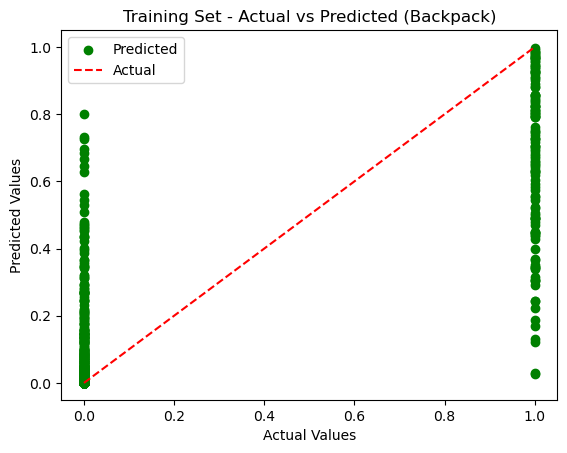

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


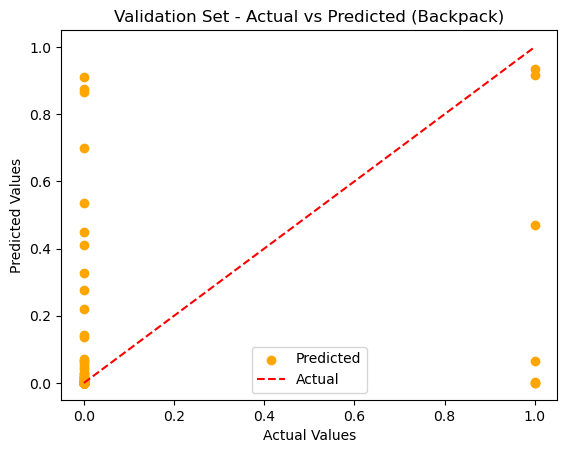

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


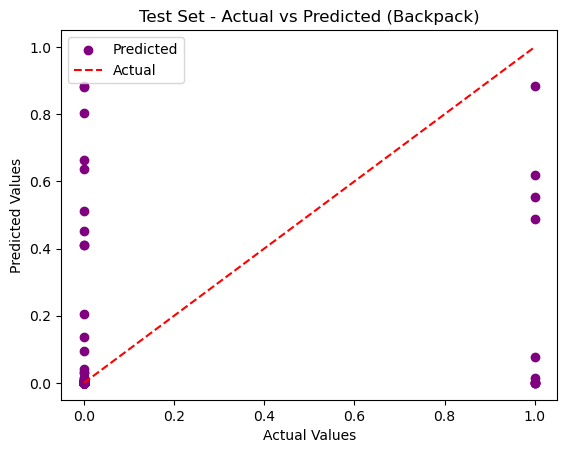

Scatter plot for Belt:
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


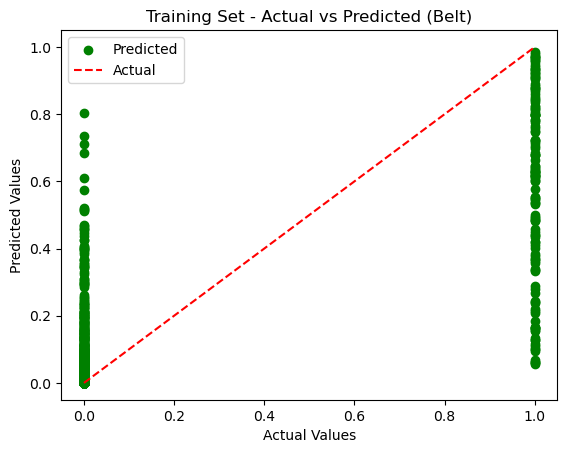

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


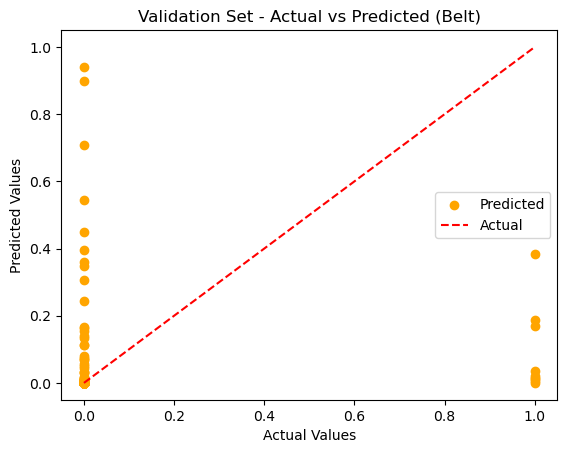

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


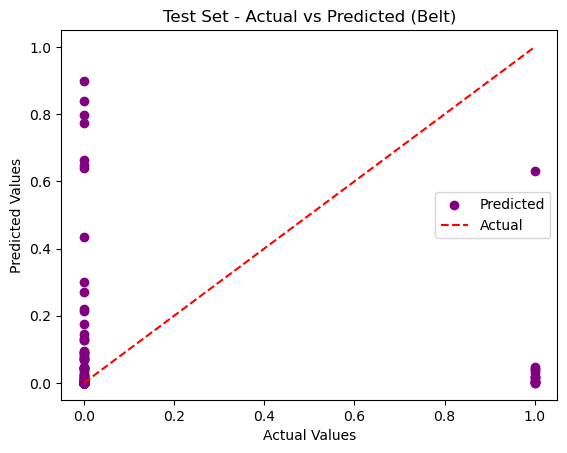

Scatter plot for Blouse:
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


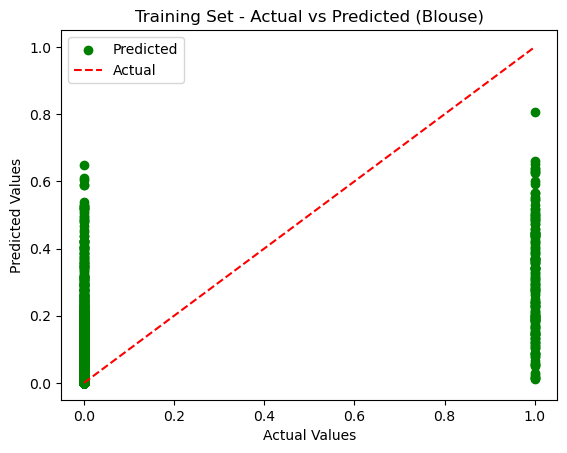

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


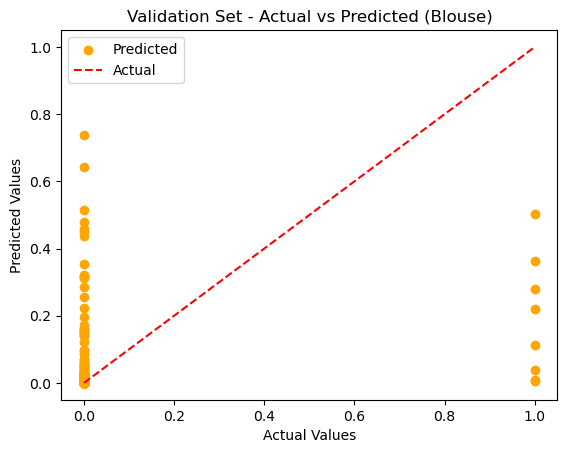

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


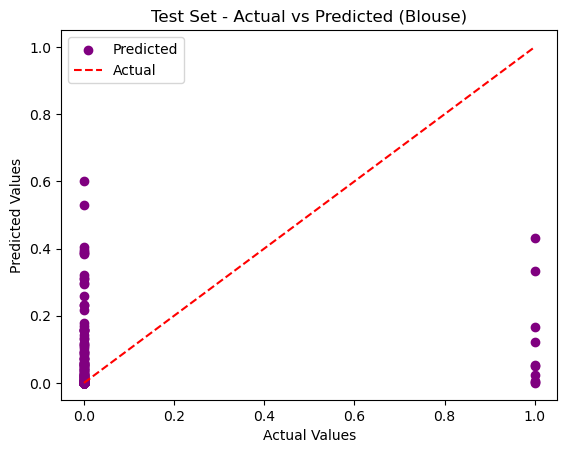

Scatter plot for Boots:
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


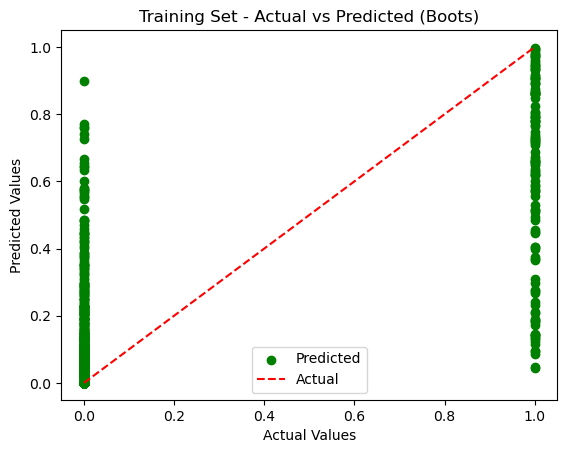

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


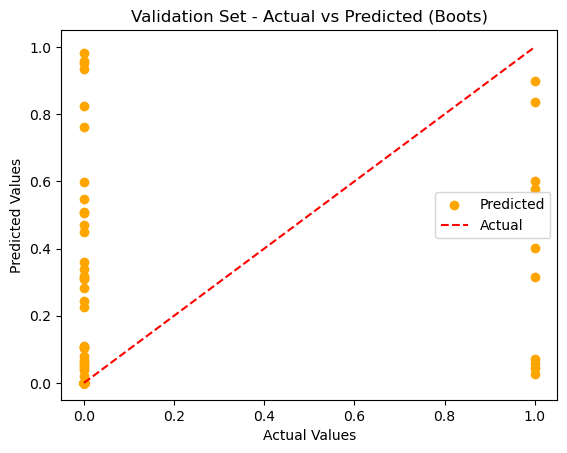

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


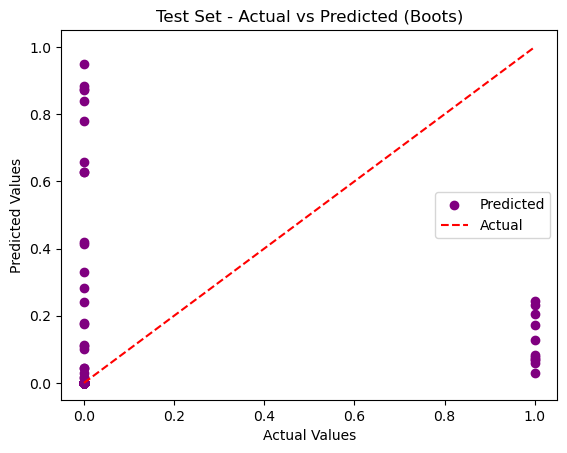

Scatter plot for Coat:
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


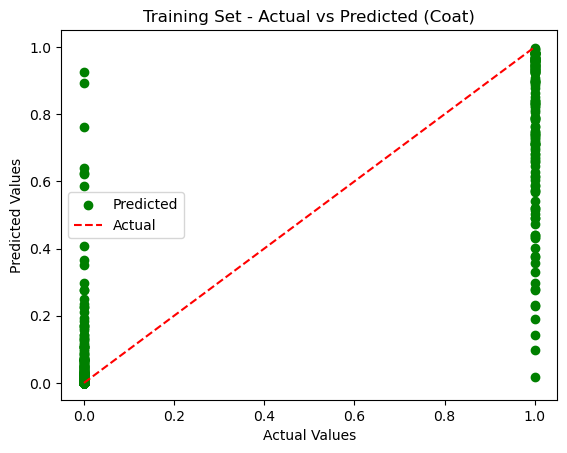

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


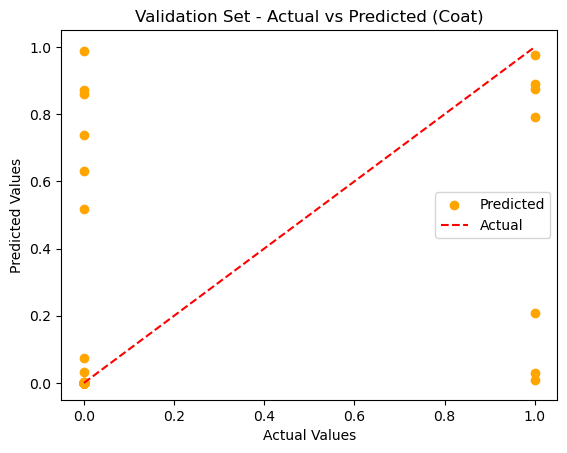

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


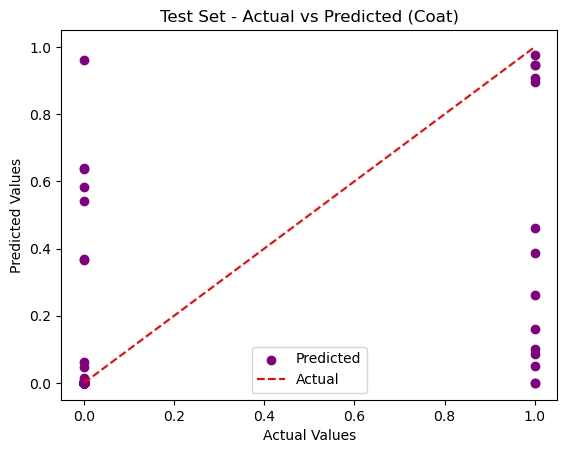

Scatter plot for Dress:
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


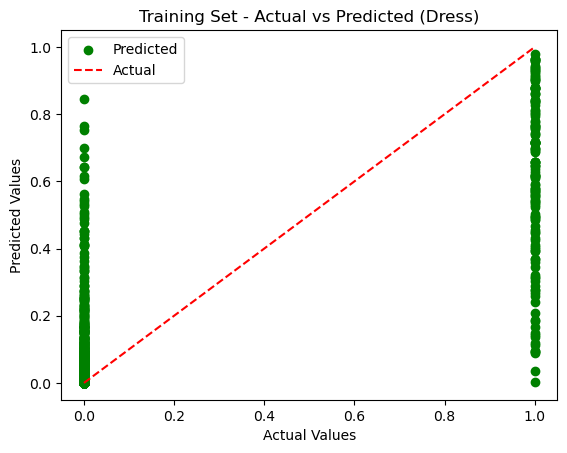

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


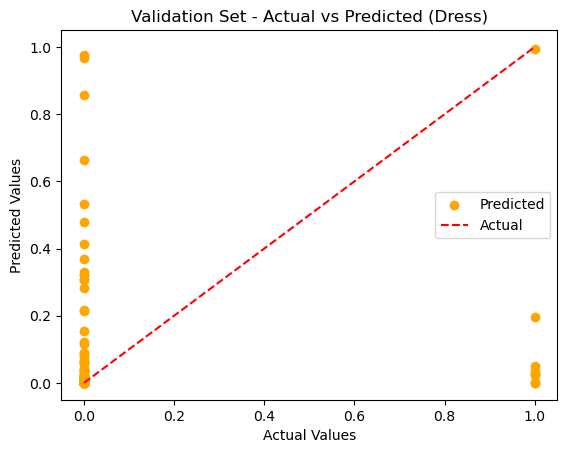

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


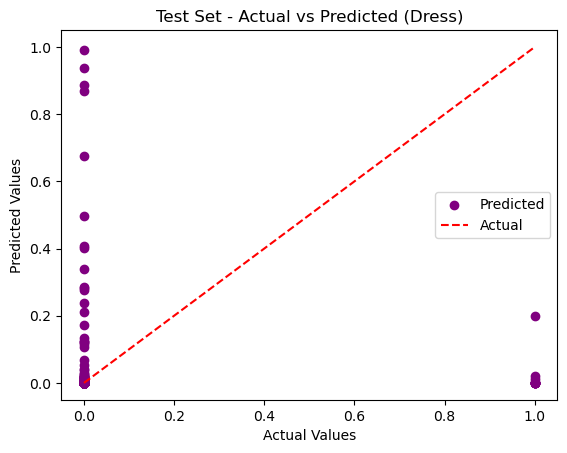

Scatter plot for Gloves:
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


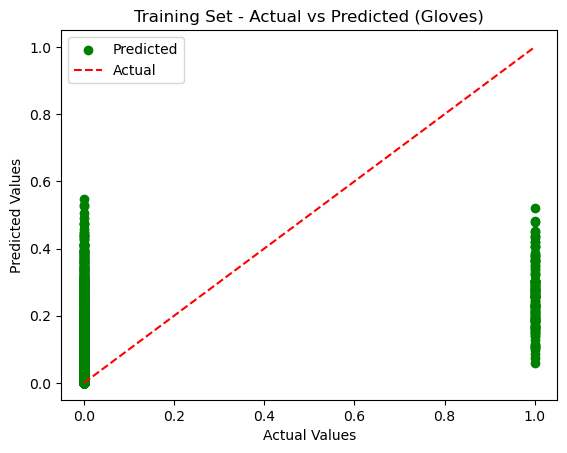

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


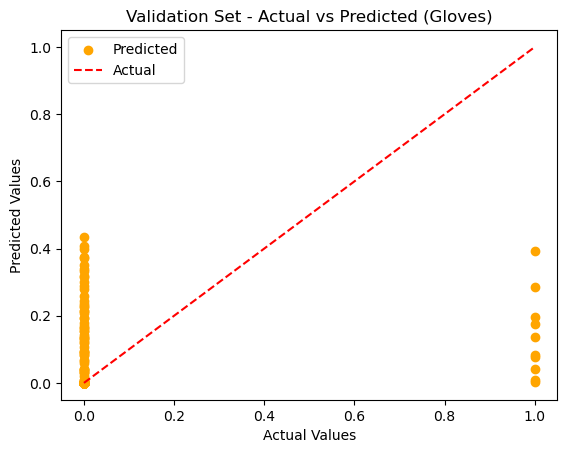

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


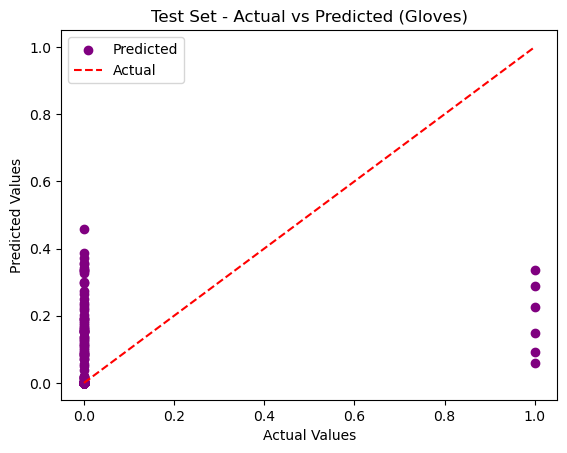

Scatter plot for Handbag:
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


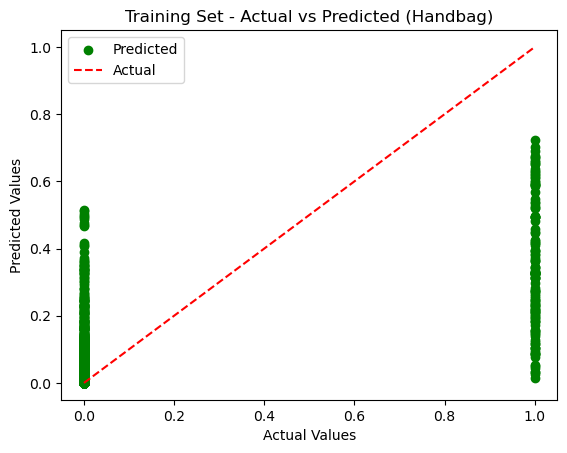

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


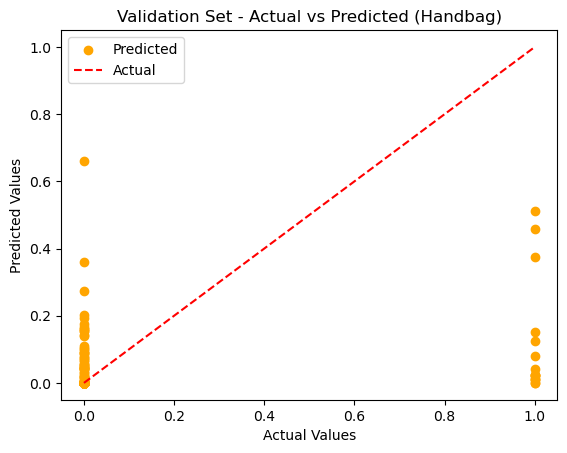

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


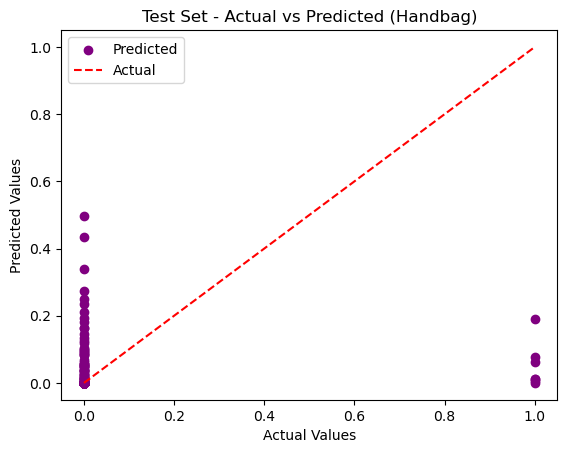

Scatter plot for Hat:
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


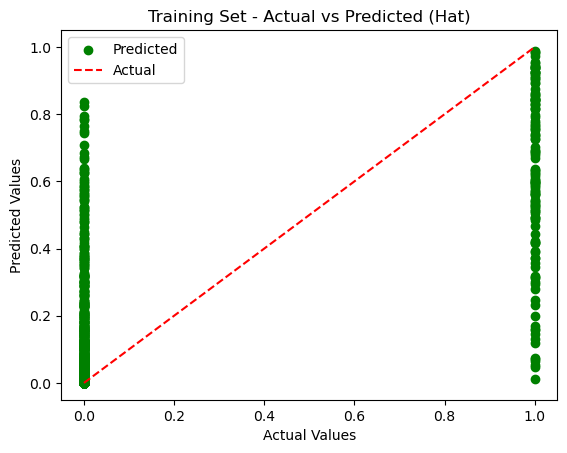

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


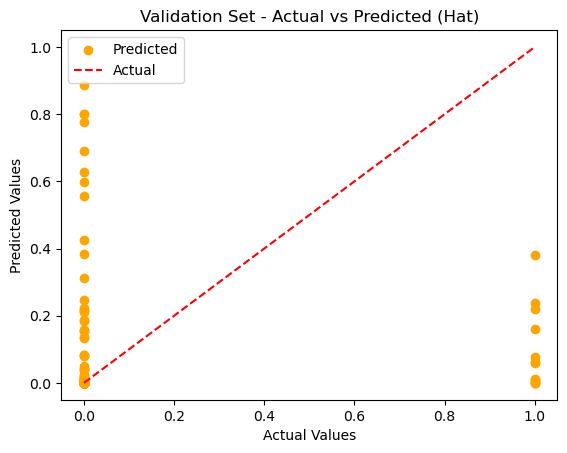

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


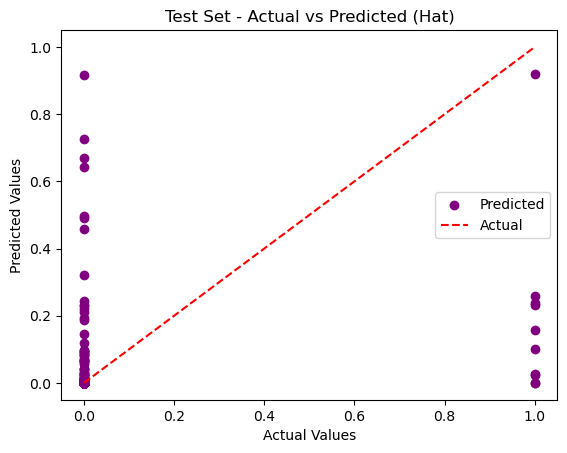

Scatter plot for Hoodie:
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


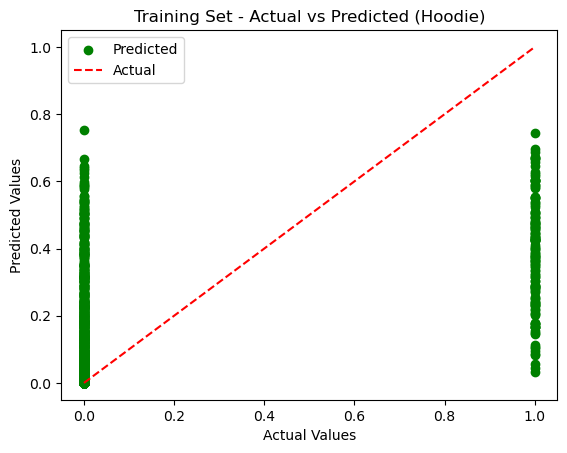

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


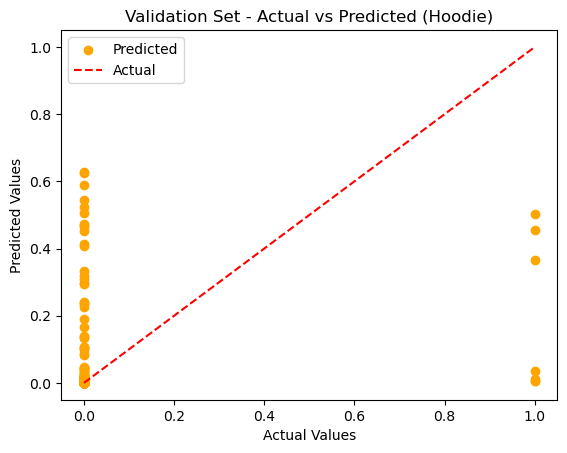

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


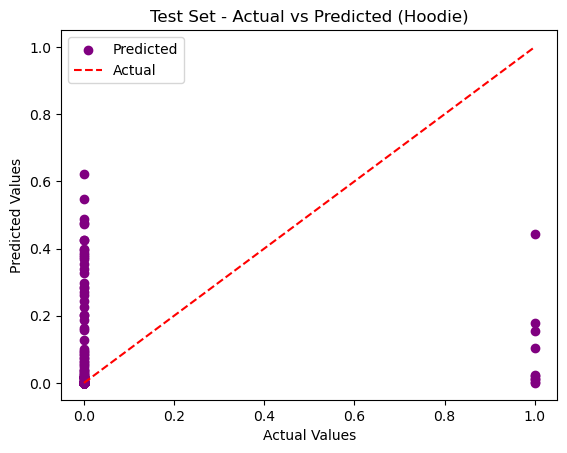

Scatter plot for Jacket:
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


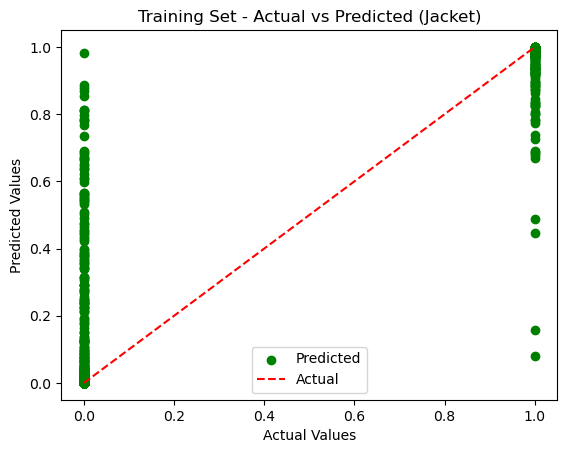

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


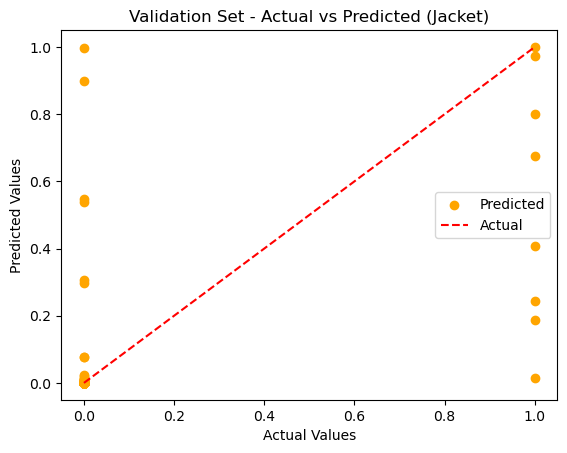

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


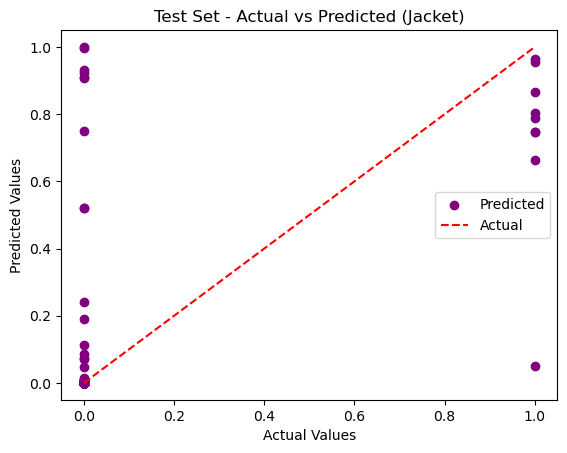

Scatter plot for Jeans:
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


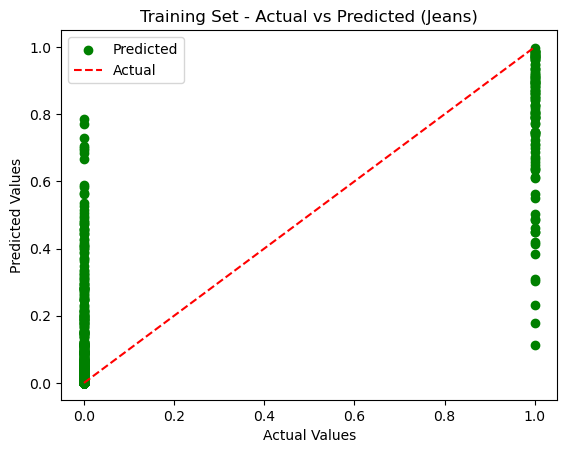

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


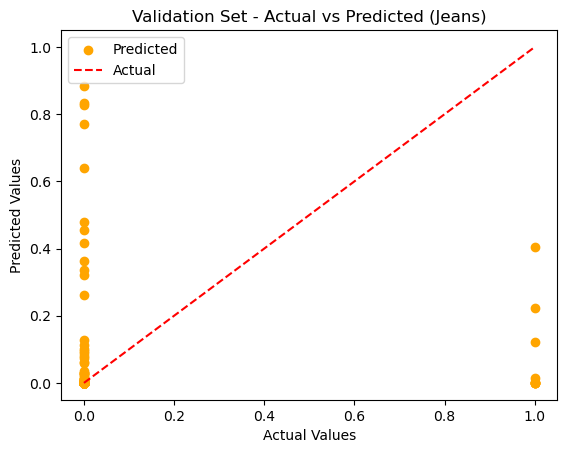

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


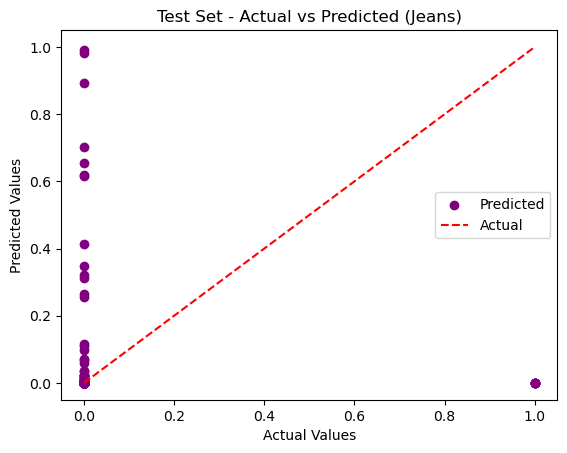

Scatter plot for Jewelry:
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


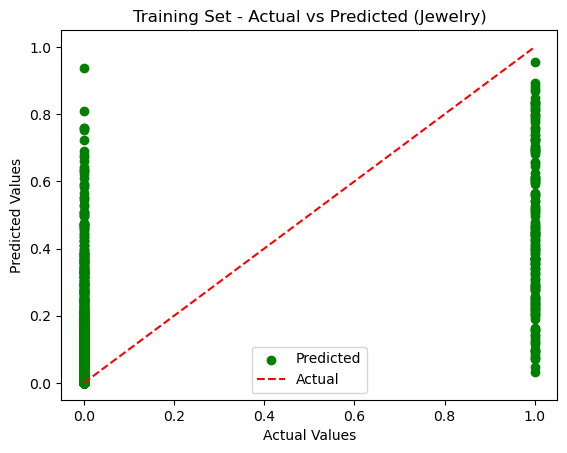

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


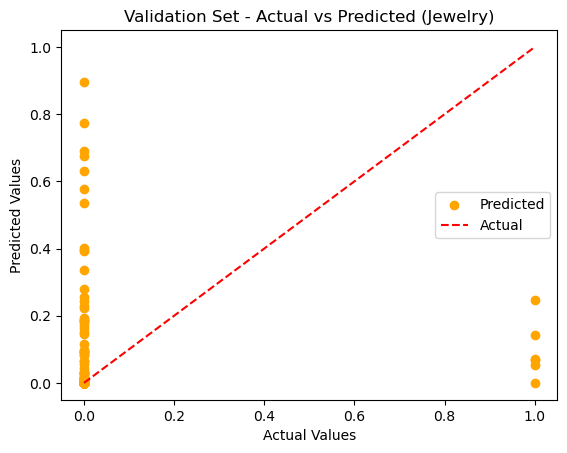

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


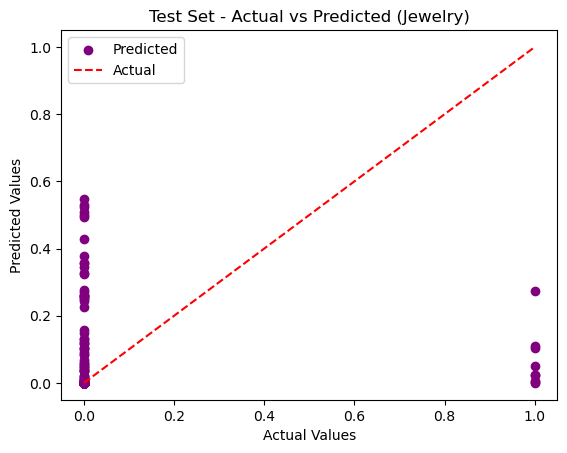

Scatter plot for Pants:
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


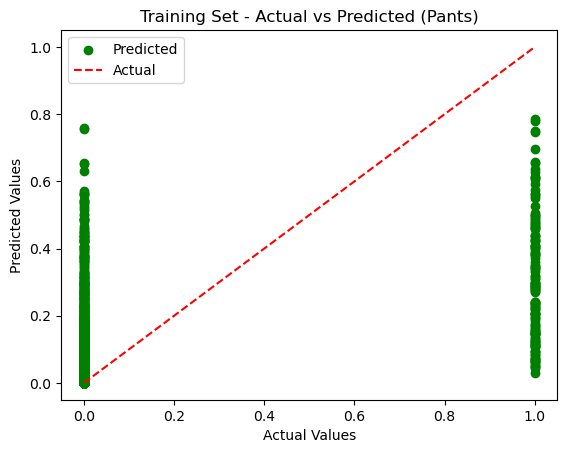

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


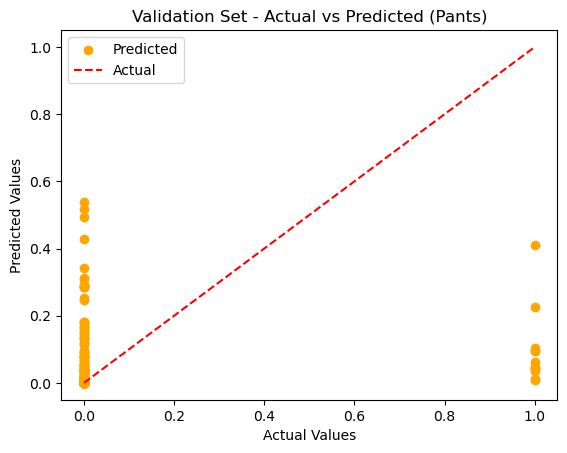

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


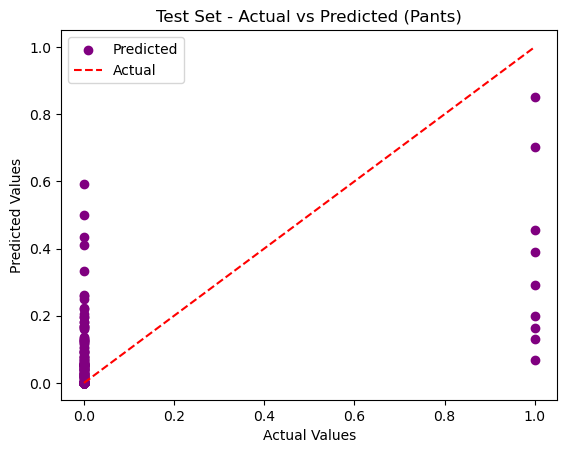

Scatter plot for Sandals:
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


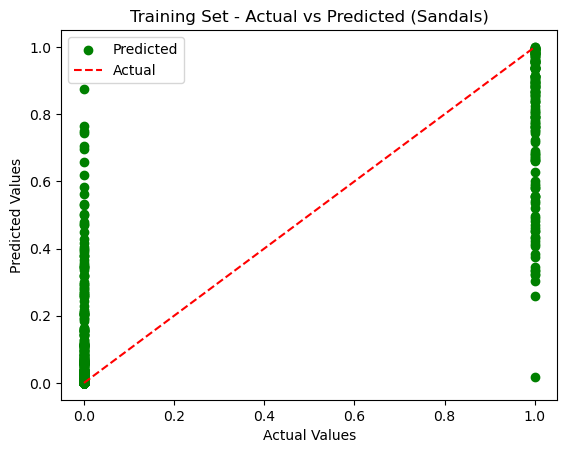

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


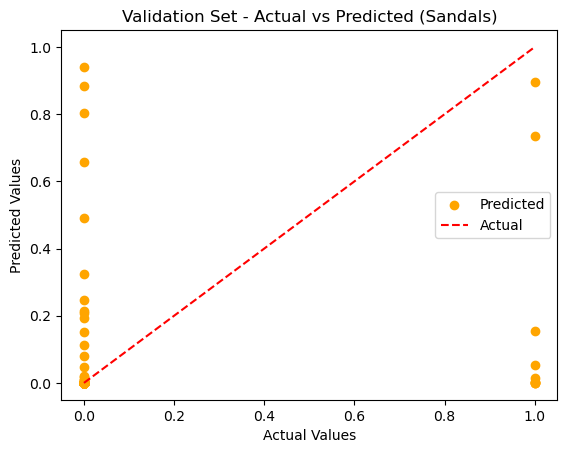

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


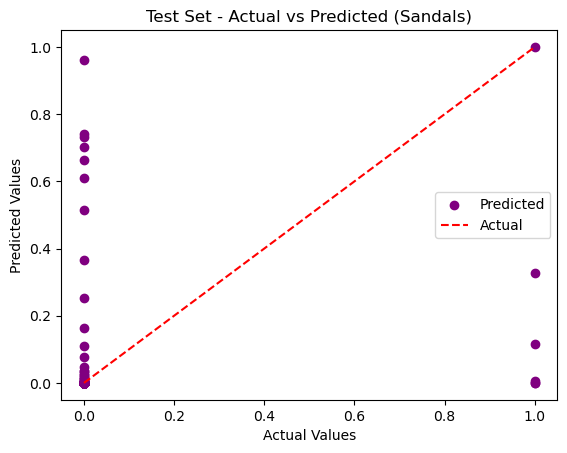

Scatter plot for Scarf:
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


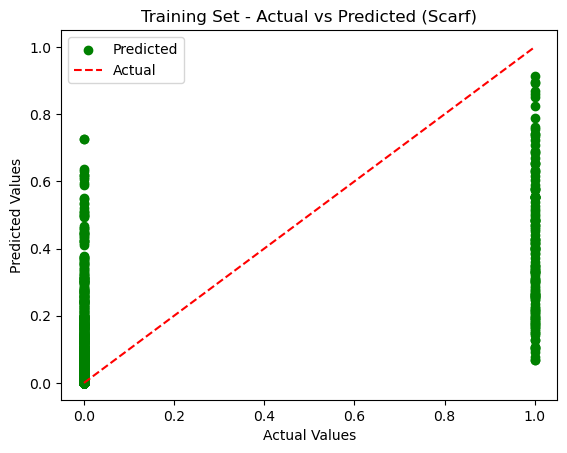

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


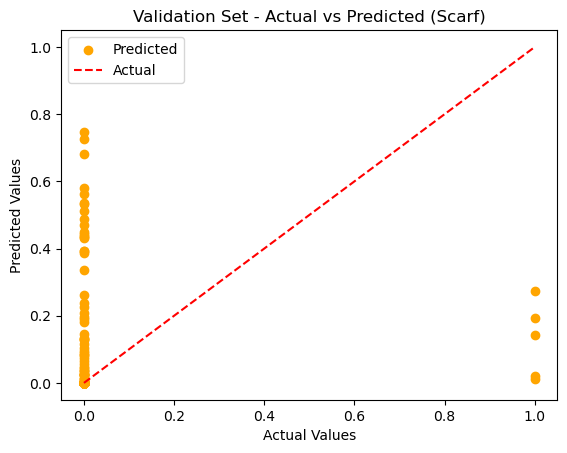

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


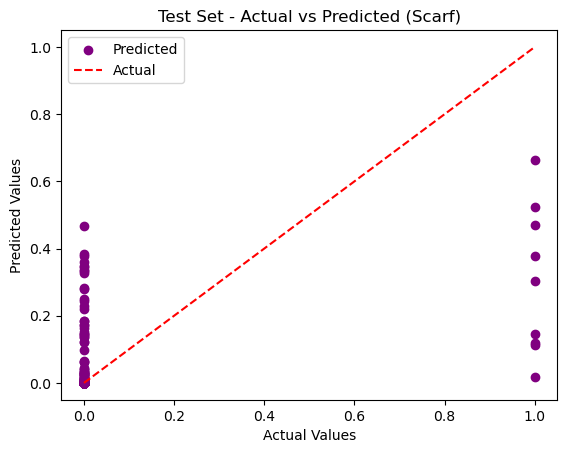

Scatter plot for Shirt:
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


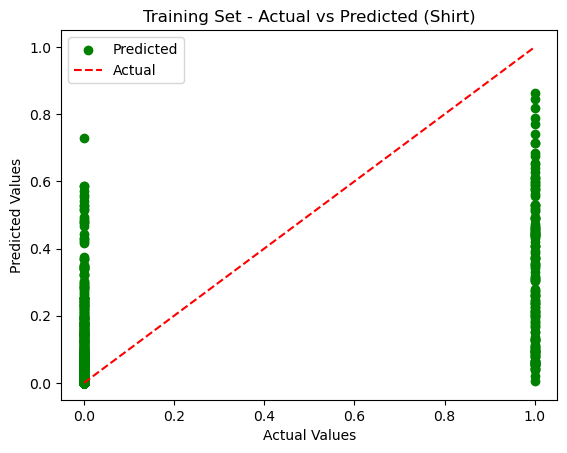

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


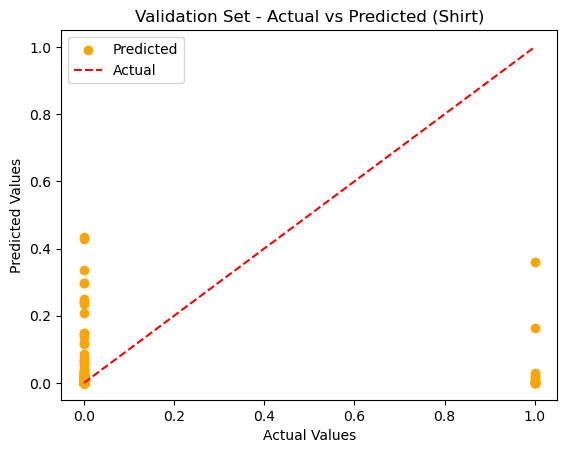

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


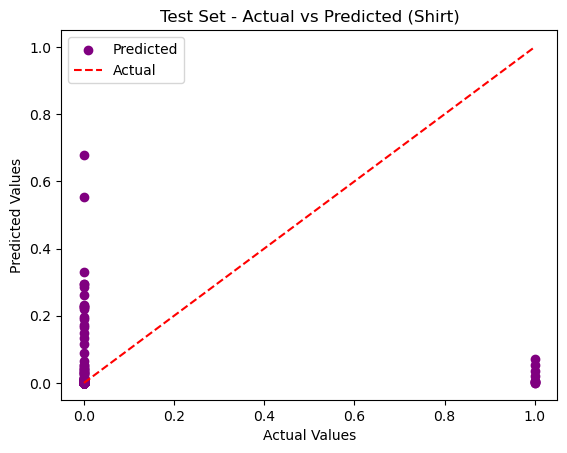

Scatter plot for Shoes:
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


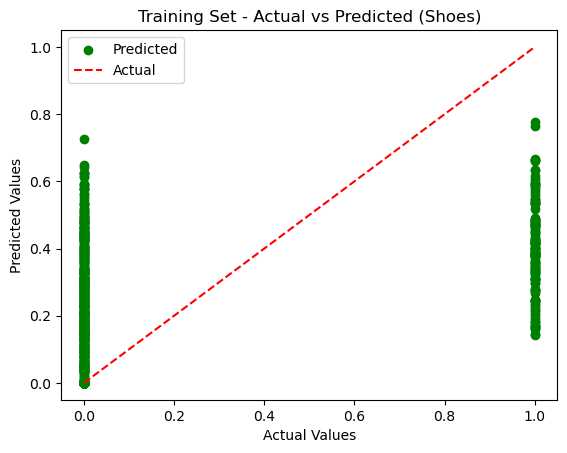

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


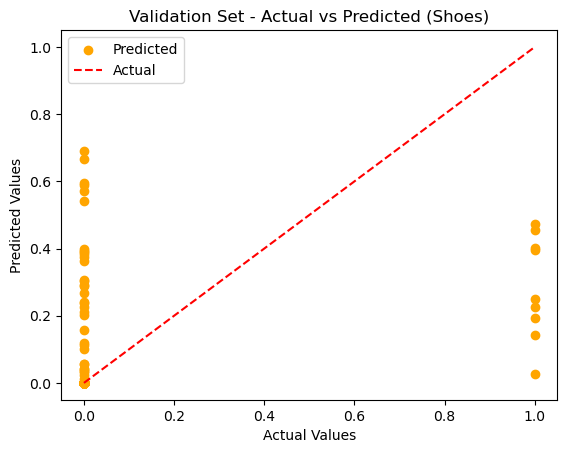

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


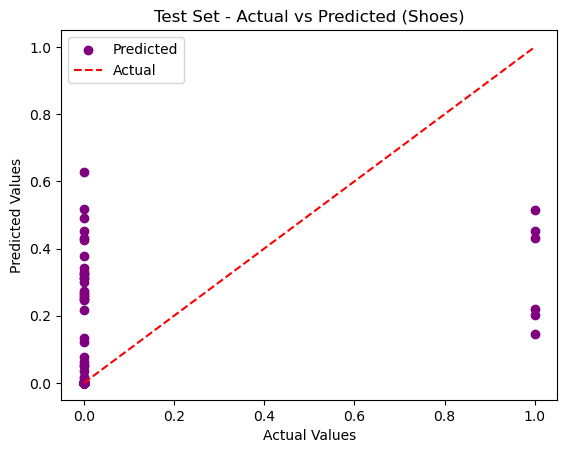

Scatter plot for Shorts:
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


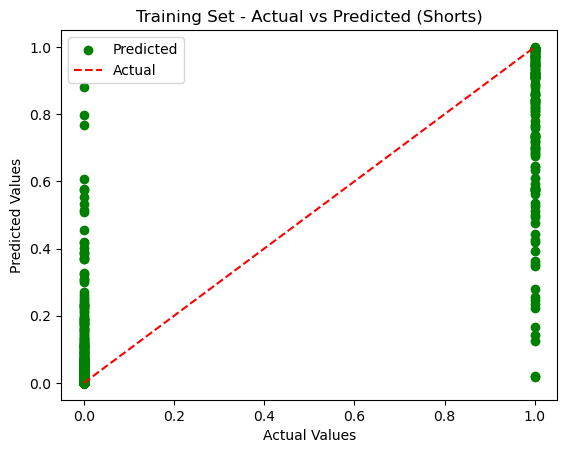

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


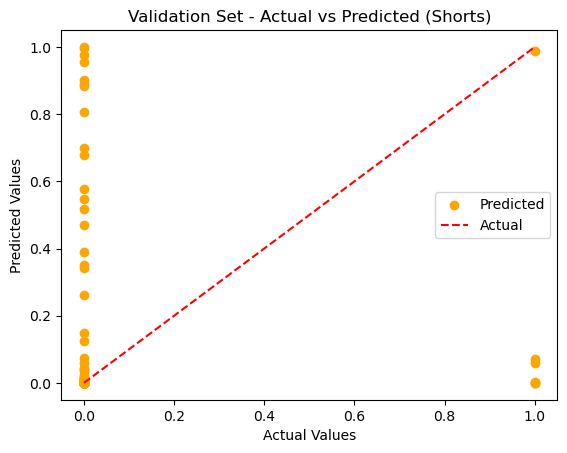

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


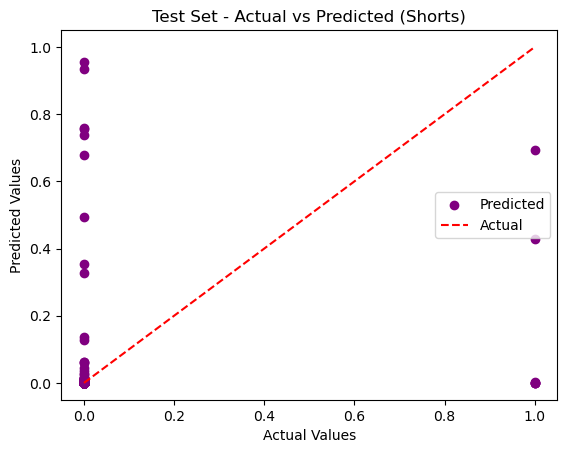

Scatter plot for Skirt:
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


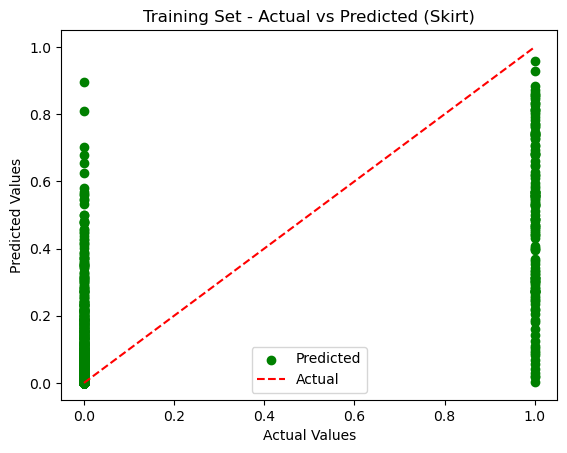

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


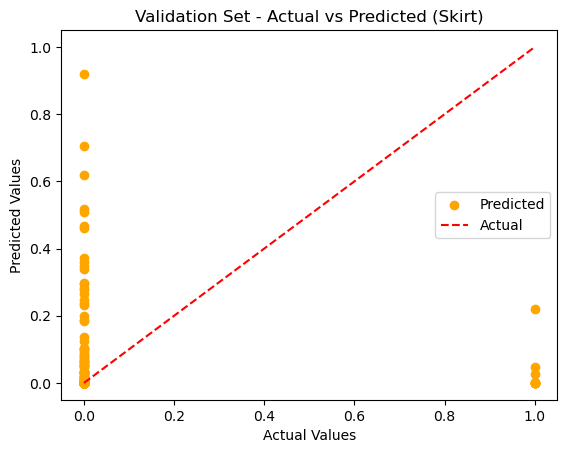

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


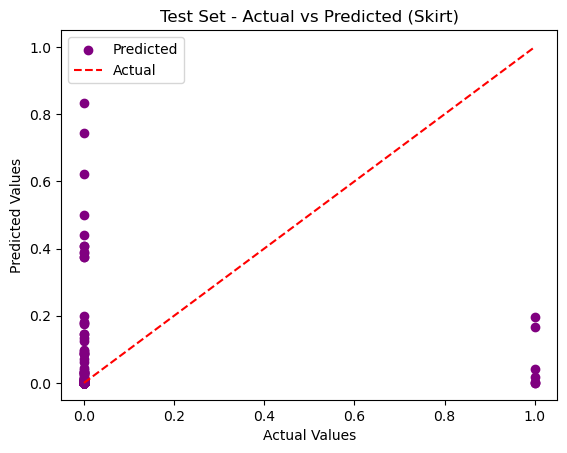

Scatter plot for Sneakers:
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


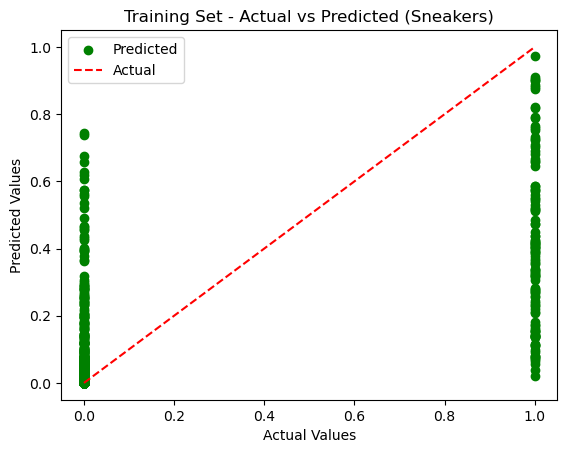

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


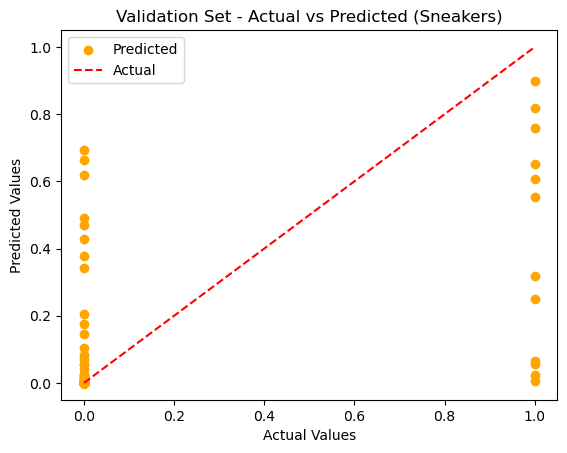

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


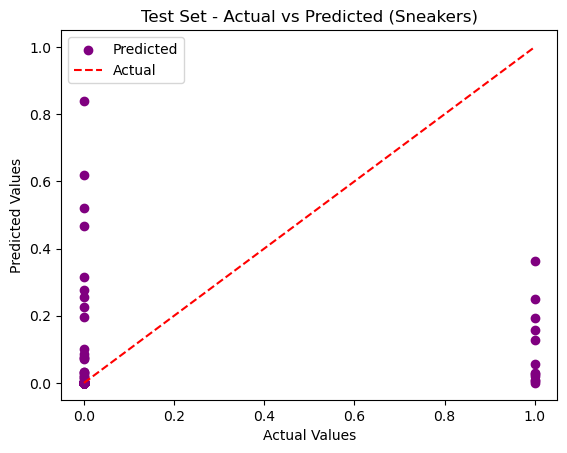

In [ ]:
# Predictions on the validation set
Y_val_pred = model.predict(X_val)

# Convert actual values to DataFrame (already in multi-output format)
df_pred = pd.DataFrame(Y_val, columns=Y_val.columns)  # Assuming Y_val is a DataFrame with multiple columns

# Convert predicted values to a DataFrame with the same column names as the actual values
df_pred_pred = pd.DataFrame(Y_val_pred, columns=Y_val.columns, index=Y_val.index)

# Concatenate the actual and predicted values DataFrame along the columns
df_pred_combined = pd.concat([df_pred, df_pred_pred.add_suffix('_pred')], axis=1)

# Display the combined DataFrame
print(df_pred_combined)

# Function to create scatter plot
def scatter_plot(actual, predicted, title, color='blue'):
    plt.scatter(actual, predicted, color=color, label='Predicted')
    plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], color='red', linestyle='--', label='Actual')  # Adding a line for actual values
    plt.title(title)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

# Create scatter plots for each product category in the multi-output prediction
for column in Y_val.columns:
    print(f"Scatter plot for {column}:")
    
    # Predictions on the training set for the current column
    Y_train_pred_column = model.predict(X_train)[:, Y_val.columns.get_loc(column)]
    scatter_plot(Y_train[column], Y_train_pred_column, f'Training Set - Actual vs Predicted ({column})', color='green')

    # Predictions on the validation set for the current column
    Y_val_pred_column = model.predict(X_val)[:, Y_val.columns.get_loc(column)]
    scatter_plot(Y_val[column], Y_val_pred_column, f'Validation Set - Actual vs Predicted ({column})', color='orange')

    # Predictions on the test set for the current column
    Y_test_pred_column = model.predict(X_test)[:, Y_val.columns.get_loc(column)]
    scatter_plot(Y_test[column], Y_test_pred_column, f'Test Set - Actual vs Predicted ({column})', color='purple')
